In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image_metrics = [filename for filename in os.listdir('./') if filename.endswith('_image.csv')]
pdf_metrics = [filename for filename in os.listdir('./') if filename.endswith('_pdf.csv')]
agent_metrics = [filename for filename in os.listdir('./') if filename.endswith('_alexey.csv')]

In [3]:
parameters = {
    "benzimidazole": {
        "string": ["compound_id", "smiles", "target_type", "target_relation", "target_units", "bacteria"],
        "numeric": ["target_value"]
        },
    "oxazolidinone": {
        "string": ["compound_id", "smiles", "target_type", "target_relation", "target_units", "bacteria"],
        "numeric": ["target_value"]
        },
    "cocrystals": {
        "string": ["name_cocrystal", "ratio_cocrystal", "name_drug", "SMILES_drug", "name_coformer", "SMILES_coformer", "photostability_change"],
        "numeric": []
        },
    "complexes": {
        "string": ["compound_id", "compound_name", "SMILES", "SMILES_type"],
        "numeric": ["target"]
        },
    "nanozymes": {
        "string": ["formula", "activity", "syngony", "surface", "km_unit", "vmax_unit", "reaction_type", "c_const_unit", "ccat_unit"],
        "numeric": ["length", "width", "depth", "km_value", "vmax_value", "c_min", "c_max", "c_const", "ccat_value", "ph", "temperature"]
        },
    "magnetic": {
        "string": ["name", "np_core", "np_shell", "core_shell_formula", "np_shell_2", "np_shell_3", "crystal_structure_core_shell", "space_group_core", "space_group_shell", "xrd_crystallinity", "instrument"],
        "numeric": ["np_hydro_size", "xrd_scherrer_size", "emic_size", "squid_sat_mag", "squid_rem_mag", "exchange_bias_shift_Oe", "vertical_loop_shift_M_vsl_emu_g", "hc_kOe", "squid_h_max", "zfc_h_meas", "fc_field_T", "squid_temperature", "coercivity", "htherm_sar", "mri_r1", "mri_r2", "blocking_temperature_K", "curie_temperature_K"]
        },
    "cytotoxicity": {
        "string": ["material", "shape", "coat_functional_group", "synthesis_method", "surface_charge", "human_animal", "cell_source", "cell_tissue", "cell_morphology", "cell_age", "test", "test_indicator"],
        "numeric": ["core_nm", "size_in_medium_nm", "hydrodynamic_nm", "potential_mv", "zeta_in_medium_mv", "no_of_cells_cells_well", "time_hr", "concentration", "viability_%"]
        },
    "seltox": {
        "string": ["np", "coating", "bacteria", "strain", "np_synthesis", "method", "shape", "solvent_for_extract", "precursor_of_np"],
        "numeric": ["mdr", "mic_np_µg_ml", "concentration", "zoi_np_mm", "np_size_min_nm", "np_size_max_nm", "np_size_avg_nm", "time_set_hours", "zeta_potential_mV", "temperature_for_extract_C", "duration_preparing_extract_min", "concentration_of_precursor_mM", "hydrodynamic_diameter_nm", "ph_during_synthesis"]
        },
    "synergy": {
        "string": ["NP", "bacteria", "strain", "NP_synthesis", "drug", "shape", "method", "MDR", "effect", "coating_with_antimicrobial_peptide_polymers"],
        "numeric": ["drug_dose_µg_disk", "NP_concentration_µg_ml", "NP_size_min_nm", "NP_size_max_nm", "NP_size_avg_nm", "ZOI_drug_mm_or_MIC_µg_ml", "error_ZOI_drug_mm_or_MIC_µg_ml", "ZOI_NP_mm_or_MIC_np_µg_ml", "error_ZOI_NP_mm_or_MIC_np_µg_ml", "ZOI_drug_NP_mm_or_MIC_drug_NP_µg_ml", "error_ZOI_drug_NP_mm_or_MIC_drug_NP_µg_ml", "fold_increase_in_antibacterial_activity", "zeta_potential_mV", "FIC", "time_hr", "combined_MIC", "peptide_MIC", "viability_%", "viability_error"]
        }
}

In [4]:
def organize_metrics(filename):
    if 'agent' in filename:
        dataset = filename.split('_')[0].split('/')[-1]        
    else:
        dataset = filename.split('_')[1]
    df = pd.read_csv(filename)

    df_string = df[df.iloc[:, 0].isin(parameters[dataset]['string'])]
    precision_string = df_string.precision.tolist()
    recall_string = df_string.recall.tolist()
    f1_string = df_string.f1.tolist()
    
    df_numeric = df[df.iloc[:, 0].isin(parameters[dataset]['numeric'])]
    precision_numeric = df_numeric.precision.tolist()
    recall_numeric = df_numeric.recall.tolist()
    f1_numeric = df_numeric.f1.tolist()
    
    return precision_string, recall_string, f1_string, precision_numeric, recall_numeric, f1_numeric

In [21]:
def create_radar_chart(metrics_filenames):
    all_string_means = []
    all_numeric_means = []
    for filename in metrics_filenames:
        precision_string, recall_string, f1_string, precision_numeric, recall_numeric, f1_numeric = organize_metrics(filename)
        
        string_means = [
        np.mean(precision_string),
        np.mean(recall_string),
        np.mean(f1_string)
        ]
        all_string_means.append(string_means)
        
        numeric_means = [
        np.mean(precision_numeric),
        np.mean(recall_numeric),
        np.mean(f1_numeric)
        ]
        all_numeric_means.append(numeric_means)
        
    all_precision_string_means = [i[0] for i in all_string_means]
    all_recall_string_means = [i[1] for i in all_string_means]
    all_f1_string_means = [i[2] for i in all_string_means]
    all_precision_numeric_means = [i[0] for i in all_numeric_means]
    all_recall_numeric_means = [i[1] for i in all_numeric_means]
    all_f1_numeric_means = [i[2] for i in all_numeric_means]
    all_precision_numeric_means.pop(1)
    all_recall_numeric_means.pop(1)
    all_f1_numeric_means.pop(1)

    labels = ['Benzimidazoles', 'Co-crystals', 'Complexes', 'Cytotox', 'Nanomag', 'Nanozymes', 'Oxazolidinones', 'Seltox', 'Synergy']
    num_vars = len(labels)
    
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    all_precision_string_means += all_precision_string_means[:1]
    all_recall_string_means += all_recall_string_means[:1]
    all_f1_string_means += all_f1_string_means[:1]
    all_precision_numeric_means += all_precision_numeric_means[:1]
    all_recall_numeric_means += all_recall_numeric_means[:1]
    all_f1_numeric_means += all_f1_numeric_means[:1]
    
    fig, axs = plt.subplots(1, 2, subplot_kw=dict(polar=True), figsize=(10, 5))

    # STRING radar
    axs[0].plot(angles, all_precision_string_means, color='purple', linewidth=2, label='Precision')
    axs[0].fill(angles, all_precision_string_means, color='purple', alpha=0.25)
    axs[0].plot(angles, all_recall_string_means, color='green', linewidth=2, label='Recall')
    axs[0].fill(angles, all_recall_string_means, color='green', alpha=0.25)
    axs[0].plot(angles, all_f1_string_means, color='blue', linewidth=2, label='F1')
    axs[0].fill(angles, all_f1_string_means, color='blue', alpha=0.25)
    axs[0].set_title('STRING')
    axs[0].set_xticks(angles[:-1])
    axs[0].set_xticklabels(labels, fontsize=12)
    axs[0].set_ylim([0,1])

    # NUMERIC radar
    labels.pop(1)
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angles += angles[:1]
    axs[1].plot(angles, all_precision_numeric_means, color='purple', linewidth=2, label='Precision')
    axs[1].fill(angles, all_precision_numeric_means, color='purple', alpha=0.25)
    axs[1].plot(angles, all_recall_numeric_means, color='green', linewidth=2, label='Recall')
    axs[1].fill(angles, all_recall_numeric_means, color='green', alpha=0.25)
    axs[1].plot(angles, all_f1_numeric_means, color='blue', linewidth=2, label='F1')
    axs[1].fill(angles, all_f1_numeric_means, color='blue', alpha=0.25)
    axs[1].set_title('NUMERIC')
    axs[1].set_xticks(angles[:-1])
    axs[1].set_xticklabels(labels, fontsize=12)
    axs[1].set_ylim([0,1])
    
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=3, fontsize=12)
    
    if metrics_filenames == image_metrics:
        title = 'IMAGES'
    elif metrics_filenames == pdf_metrics:
        title = 'PDF'
    else:
        title = 'SINGLE AGENT'
    fig.suptitle(title, fontsize=15)
    
    plt.tight_layout()
    plt.savefig(f'{title}.svg',
        format='svg',
        dpi=500)

c:\Users\computer\AppData\Local\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\computer\AppData\Local\miniconda3\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


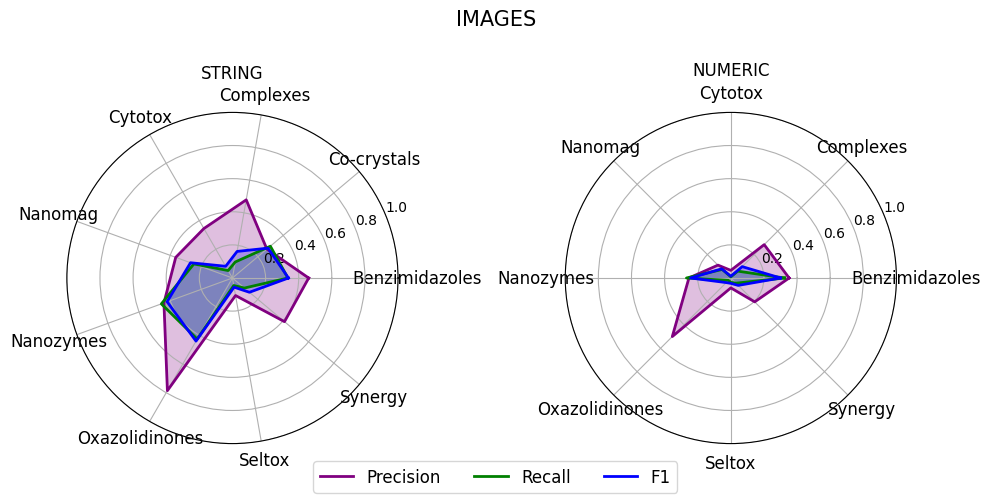

In [22]:
create_radar_chart(image_metrics)

c:\Users\computer\AppData\Local\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\computer\AppData\Local\miniconda3\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


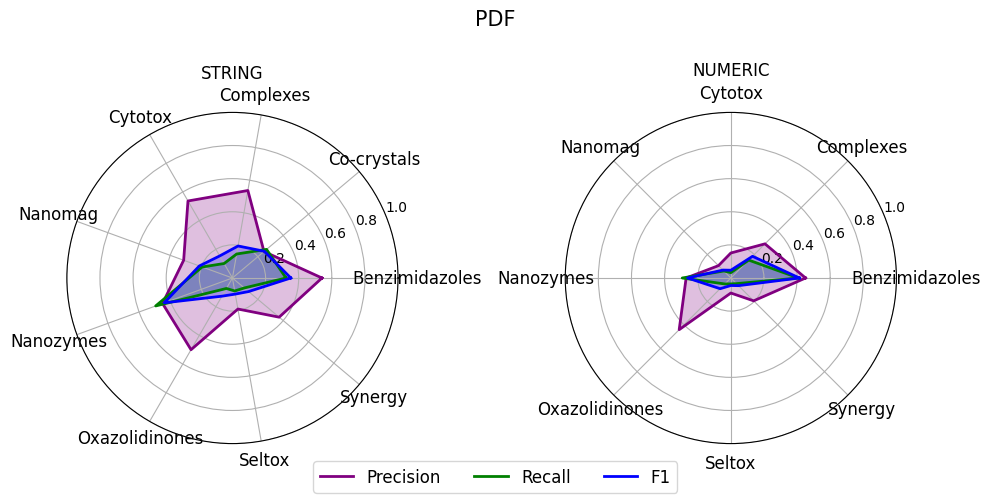

In [23]:
create_radar_chart(pdf_metrics)

c:\Users\computer\AppData\Local\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\computer\AppData\Local\miniconda3\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


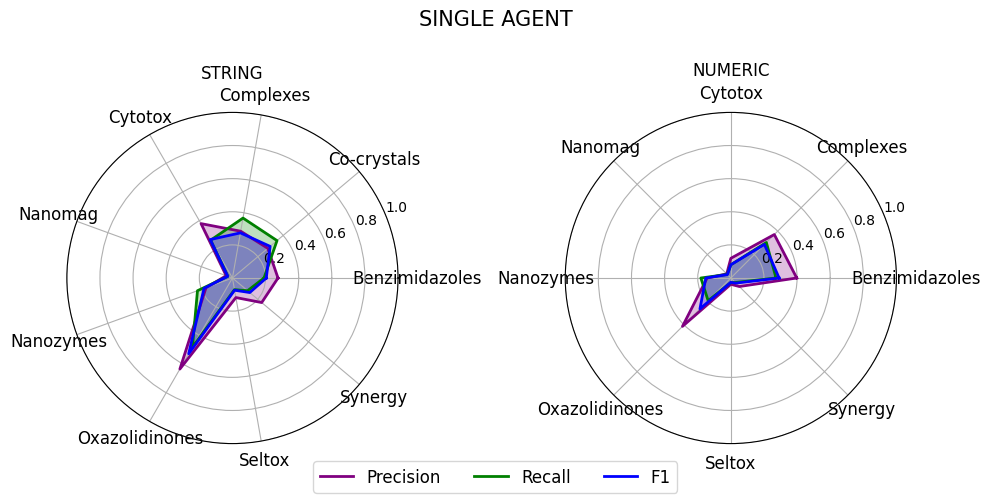

In [24]:
create_radar_chart(agent_metrics)